#**Problema de la galería de arte**
- Consideramos polígonos simples
- Sin autointersecciones

**Reflexiones de Vaclav Chvatal(1946 Praga)**

Polígonos 3 vértices:
- 1 cámara
- Sirven todos los puntos

Polígonos 4 vértices:
- 1 cámara
- "bien ubicada"

Pölígonos de 5 vértices:
- 1 cámara
- "bien ubicada"

Polígono de 6 vértices:
- 2 cámaras
- Bien ubicadas

## **¿Cómo vigilar un polígono?**

- La triangulación es importante

¿cuántas cámaras necesito para vigilar el polígono de n-vértices?

- $n-2$ cámaras
- $\dfrac{n-2}{2}$ cámaras
- $⌊\dfrac{n}{3}⌋$ cámaras(función piso)
--------------------------------------------------
3 vértices: 1 cámara

4 vértices: 1 cámara

5 vértices: 1 cámara

6 vértices: 2 cámaras

# **TRES COLORACIÓN**
Una vez hecha la triangulación se asignan 3 colores diferentes a los vértices de cada triángulo.

**¿siempre podemos hacer 3 coloración?**

Tenemos triangulaciones sobre polígonos simples.

Puedo construir un grafo dual a la triangulación.

-------------------------------------------------
Nuestro primer reto es hacer la triangulación, para esto usaremos:
###**Partición en piezas monótonas**

- la monotonía de un poligono esta definida en su dirección de referencia (en nuestro caso, línea recta)

- Un polígono es monótono respecto a $y$ si el recorrido desde el punto más alto al punto más bajo se hace siempre bajando.

**vértices de giro**

Aquellos en los que cambia la dirección de movimiento de subir a bajar o lo contrario.

----------------------------------------------------------------
Si tengo n vértices los etiqueto como $V_i: i=1,2,...,n$

Las aristas las etiqueto como:
- $e_j = \bar{v_j v_{j+1}}$, $j=1,2,...,n-1$

- $e_n = \bar{v_n v_1}$

Los $v_i$ se etiquetan de tal forma que el polígono se recorra en sentido **antihorario**

>Relación de orden para los puntos:
$$p≺q ⇔  p_y > q_y~ V~ (p_y=q_y 𝝠 p_x<q_x)$$
> $q$ está después de $p$

- $\Box$ **Nodo inicio:** sus vértices están debajo(después) y el ángulo que forman las aristas adyacentes es menor que $\pi$. Si el ángulo es mayor que $\pi$, el vértice es de **división (split vertex)** $\blacktriangle$.

- $\blacksquare$ **nodo fin:** sus vecinos están arriba (antes) y el ángulo que forman las aristas adyacentes es menor que $\pi$. Si el ángulo es mayor que $\pi$, el vértice es de **unión(merge vertex)** $\bigtriangledown$

- $\circ$ **nodo regular:** sus vecinos están uno antes y otro después.

### Ejercicio: implementar clasificación de los vértices


In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [42]:
class Edge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp

  def __repr__(self):
    return(f"(inicio: {self.startp}, final: {self.endp})")


In [43]:
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'blue')
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'limegreen')
  plt.grid(True)
  plt.show()

In [44]:
p = [Point(1,5,'p1'), Point(-1,-1,'p2'), Point(2,2, 'p3'), Point(5,-2,'p4'), Point(8,3,'p5'), Point(5,1,'p6')]

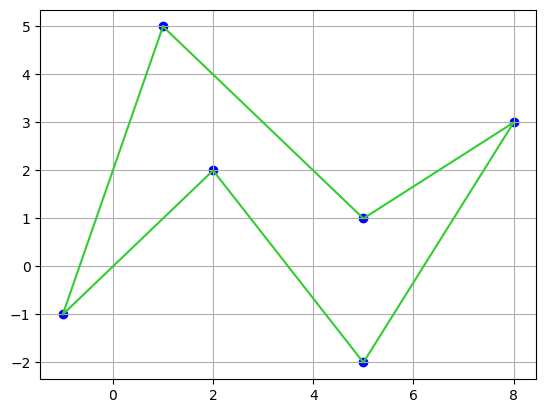

In [45]:
polygon(p)

In [1]:
def setEdges(p):
  edges = []
  for i in range(len(p)-1):
    edges.append(Edge(p[i], p[i+1]))

  edges.append(Edge(p[-1], p[0]))
  print(edges)
  return edges

In [74]:
edges = setEdges(p)

[(inicio: (1, 5), final: (-1, -1)), (inicio: (-1, -1), final: (2, 2)), (inicio: (2, 2), final: (5, -2)), (inicio: (5, -2), final: (8, 3)), (inicio: (8, 3), final: (5, 1)), (inicio: (5, 1), final: (1, 5))]


In [70]:
def SortBy(p):
  sorted = []
  pointsc = p.copy()
  print(pointsc)
  while len(pointsc):
    pi = pointsc[0]
    for q in pointsc:
      if (pi.y > q.y) or (pi.y == q.y and pi.x < q.x):
        pi = pi
      else:
        pi = q
    sorted.append(pi)
    pointsc.pop(pointsc.index(pi))
  return sorted
  print(sorted)


In [73]:
sorted = SortBy(p)

[(1, 5), (-1, -1), (2, 2), (5, -2), (8, 3), (5, 1)]


In [48]:
def cross(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

In [49]:
def turn(p0, p1, p2):
  if cross(p0,p1,p2)>0:
    return True #izquierda
    #print(f"En {p1} se hace un giro en sentido anti-horario")
  elif cross(p0,p1,p2)<0:
    return False #derecha
    #print(f"En {p1} se hace un giro en sentido horario")
  else:
    return False #no hay giro
    #print(f"En {p1} no se hace giro")

In [2]:
def SetType(sorted, edges):
  for point in sorted:
    for edge in edges:
      index = edges.index(edge)-1
      if point == edge.startp and point.y > edge.endp.y and point.y > edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "start"

        else:
          point.type = "split"

      elif point == edge.startp and point.y < edge.endp.y and point.y < edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "end"

        else:
          point.type = "merge"


  for point in sorted:
    if point.type == None:
      point.type = "normi"

    print(point, point.type)


In [75]:
SetType(sorted, edges)

(1, 5) start
(8, 3) start
(2, 2) split
(5, 1) merge
(-1, -1) end
(5, -2) end


In [3]:
def polygon_byType(points, vcolor, lcolor):
  edges = setEdges(points)
  sorted = SortBy(points)
  SetType(sorted, edges)

  xcoor = []
  ycoor = []
  for i in points:
    if i.type =="start":
      plt.scatter(i.x, i.y, marker = 's', facecolor = 'none', edgecolor = vcolor, s=80)
    elif i.type == "end":
      plt.scatter(i.x, i.y, marker = 's', color = vcolor, s=80)
    elif i.type == "merge":
      plt.scatter(i.x, i.y, marker = 'v', color = vcolor, s=80)
    elif i.type == "split":
      plt.scatter(i.x, i.y, marker = '^', color = vcolor, s=80)
    else:
      plt.scatter(i.x, i.y, marker = 'o', color = vcolor)
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = lcolor)
  plt.title("Polygon with classified types of vertices")
  plt.show()

[(inicio: (1, 5), final: (-1, -1)), (inicio: (-1, -1), final: (2, 2)), (inicio: (2, 2), final: (5, -2)), (inicio: (5, -2), final: (8, 3)), (inicio: (8, 3), final: (5, 1)), (inicio: (5, 1), final: (1, 5))]
[(1, 5), (-1, -1), (2, 2), (5, -2), (8, 3), (5, 1)]
(1, 5) start
(8, 3) start
(2, 2) split
(5, 1) merge
(-1, -1) end
(5, -2) end


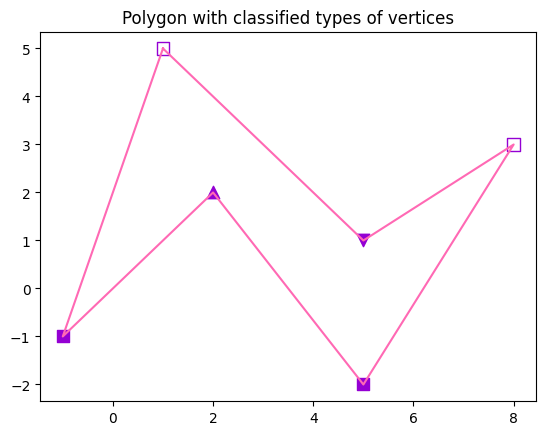

In [77]:
polygon_byType(p, 'darkviolet', 'hotpink')

In [53]:
def Classifier(points):
  edges = []
  sorted = []
  pointsc = points.copy()
  for i in range(len(p)-1):
    edges.append(Edge(p[i], p[i+1]))

  edges.append(Edge(p[-1], p[0]))

  while len(pointsc):
    pi = pointsc[0]
    for q in pointsc:
      if (pi.y > q.y) or (pi.y == q.y and pi.x < q.x):
        pi = pi
      else:
        pi = q
    sorted.append(pi)
    pointsc.pop(pointsc.index(pi))

  for point in sorted:
    for edge in edges:
      index = edges.index(edge)-1
      if point == edge.startp and point.y > edge.endp.y and point.y > edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "start"

        else:
          point.type = "split"

      elif point == edge.startp and point.y < edge.endp.y and point.y < edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "end"

        else:
          point.type = "merge"


  for point in sorted:
    if point.type == None:
      point.type = "normi"

  polygon_byType(points, 'darkviolet', 'hotpink')







In [5]:
points = [(3.1,2.9),(2.95,2.8),(2.9,4.5),(2.7,4),(2.5,4.5),(2.3,3.9),
          (2.4,3.2),(2.3,2.5),(2.2,3.1),(2.1,1.5),(2.3,0.7),(2.5,1.1),(2.8,0.5),
          (2.7,2),(3,1.7)]

In [4]:
def toPoint(P):
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i)))

  return points

In [6]:
pointsV = toPoint(points)

polygon_byType(pointsV, 'darkviolet', 'magenta')

NameError: ignored

-------------------------------------
### **División en piezas monótonas**

```
helper(ej)
```
De los vértices que están sobre la línea de barrido, $helper(e_j)$ es el que está más abajo tal que el segmento horizontal que lo conecta con $e_j$ está dentro del polígono.

> En algunos casos, $helper(e_j)$ es el extremo superior de $e_j$

Un polígono simple es y-monótono si no tiene vértices de **unión** ni de **división**.


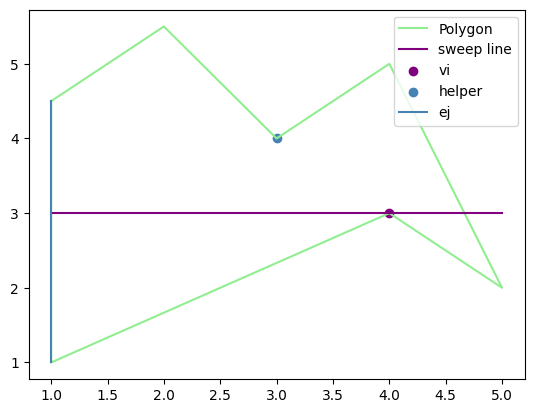

In [60]:
x = [1,1,4,5,4,3,2,1]
y = [4.5,1,3,2,5,4,5.5,4.5]

plt.plot(x,y, color='lightgreen')
plt.plot([1,5], [3,3], color = 'purple')
plt.scatter(4,3, color = 'purple')
plt.scatter(3,4, color = 'steelblue')
plt.plot([1,1], [1,4.5], color = 'steelblue')
plt.legend(['Polygon', 'sweep line', 'vi', 'helper', 'ej'])

**Pseudocódigo**
Vamos a tomar un polígono simple y hacerlo en subdivisiones y que sea y-monótono.
### Algoritmo de divisiones Y-monótonas ($P$)
**Entrada:** Polígono simple $P$ en términos de una lista de aristas doble
conectadas $D$


**Salida:** Subdivisiones y-monótonas de $P$ en términos de la lista de aristas doble conectadas.


1. Construyo una cola $Q$ con los vértices de $P$ ordenados según $≺$
2. Inicio un árbol vacío $τ$
3. Mientras $|Q|!= 0$
4. -> Borre el primer elemento $V_i$ en $Q$
5. -> Manipúlelo apropiadamente

Definimos las siguientes funciones:

**ManipularVérticeInicio $(v_i)$**
1. Agrego $e_i$ a $τ$ y defino $helper(e_i)=v_i$

**ManipularVérticeFin($v_i$)**
1. if $helper(e_{i-1})$ es vértice de unión:
2. -> Agrego a $D$ una diagonal que conecta $v_i$ con $helper(e_{i-1})$
3. Borro $e_{i-1}$ de  $τ$


**ManipularVérticeDivisión($v_i$)**
1. Busco en $\tau$ el segmento $e_j$ que está inmediatamente a la izquierda de $v_i$
2. Agrego a $D$ una diagonal qe conecta $v_i$ con $helper(e_j)$
3. actualizp $helper(ej)=v_i$
4. Agrego a $\tau$ $e_i$ y defino $helper(e_i)=v_i$

**ManipularVérticeUnión($v_i$)**
1. If $helper(e_{i-1})$ es vértice de unión:
2. -> Agrego a $D$ una diagonal que conecta $helper(e_{i-1})$ con $v_i$
3. Borro $e_{i-1}$ en $τ$
4. Busco en $\tau$ el segmento $e_j$ que está inmediatamente a la izquierda de $v_i$
5. If $helper(e_j)$ es de unión:
6. -> Agrego en $D$ una diagonal que conecta $v_i$ con $helper(e_j)$
7. Actualizo $helper(e_j)=v_i$

**ManipularVérticeRegular($v_i$)**
1. If el interior del polígono está a la derecha de $v_i$:
2. -> If  $helper(e_{i-1})$ es vértice de unión:
3. ->-> Agrego a $D$ una diagonal que conecta $v_i$ con $helper(e_{i-1})$
4. -> Borro $e_{i-1}$ en $\tau$
5. -> Agrego $e_i$ a $\tau$, defino $helper(e_i)=v_i$
6. Else:
7. -> Busco en $\tau$ a $e_j$ a la izquierdade $v_i$
8. -> If $helper(e_j)$ es de unión
9. -> -> Agrego a $D$ una diagonal que une $v_i$ con $helper(e_j)$
10. -> Actualizo $helper(e_j)=v_i$

--------------------------------------------------------------------------------




###**¿Cómo agregar una diagonal?**
Terminar apuntes

-----------------------------------------
### **Triangulación de un polígono monótono**
- todo polígono simple de n vértices, admite una triangulación que consiste en $n-2$ triángulos

- yo se que enumere los vertices en contra de las manecillas del reloj

- vamos a usar una pila que ponemos cosas por arriba y las sacamos por arriba, la ultima que puse es la primera que saco.

- como se si trazo una diagonal dentro o fuera del polígono?



##**Pseudocódigo para triangulación**
**Triangular un polígono y-monótono ($P$)**

**Entrada:** Un polígono $P$ y-monótono dado por lista de aristas doble conectadas $D$.

**Salida:** Triangulación del polígono, dada por la lista de aristas doble conectadas.


1. Ordenar los vértices con etiquetas$u_1, u_2, u_3, ..., u_n$ Según la relación $≺$.
2. Inicio una pila vacía $S$ y le agrego los dos primeros elementos ($u_1, u_2$) a $S$
3. **For $j$ in range (3, n-1): ($3≤j≤n-1$)**

    -> **If** $u_j$ y top(S) están en cadenas diferentes: (lados opuestos)?

    -> -> Pop() todos los elementos de la pila $S$.

    -> -> Trace una diagonal desde $u_j$ hasta los eliminados **excepto el útimo eliminado**

    -> -> Agrego a $D$ las diagonales

    -> -> Agrego a $S$: $u_j, u_{j-1}$

    ->**Else:**

    ->-> Pop() elementos de $S$ cuya diagonal con $u_j$ está dentro del polígono.

    ->-> Agrego a $D$ las diagonales  correctas.

    ->-> Agrego a $S$ el último vértice eliminado.

    ->-> Agrego $u_j$ a $S$.

4. (fuera del for). Trazo diagonales desde $u_n$ hasta los elementos de $S$ excepto el primero y el último.



